In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Twitter_Facebook_data.csv')

# Convert "Date Sampled" column to datetime and extract month
data['Month'] = pd.to_datetime(data['Date Sampled']).dt.month
data.drop(columns=['Date Sampled'], inplace=True)

# Filter the data
data = data[data['Agency'].isin(['311', 'ACS', 'CAU', 'Change by Us', 'City Charter', 'City Store', 'Culture', 'DCA', 'DEP',
                                'DFTA (aging)', 'DFTA', 'DHS', 'DHS (Homeless Service)', 'DOB', 'DOB: Cool Roofs',
                                'DOB: UrbanCanvas', 'DOE', 'NYC Schools', 'NYC TeachingFellows', 'I teach NYC', 'NYC Health',
                                'Eating Healthy NYC', 'NYCKnows', 'NYCQuites', 'DOI','NYC IT & Telecomm',
                                 'DOT (Department of Transportaion)', 'JanetteSadikKhan (Not Available)',
                                'DOT (Department of Transportaion)', 'You the Man NYC (not available)', 'NYC Parks',
                                'Pearl_Squirrel (not available)', 'DYCD', 'NYC zerowaste',  'Applied Sciences NYC',
                                'EDC (New York City Economic Development Corporation)', 'energyNYC', 'FDNY (Fire Department)',
                                'FUND', 'HHC', 'HDP', 'HIA', 'HRA (Human Resource Administration)', 'NYC Dad', 'NYC LatinMedia',
                                'LPC', 'Materials for the Arts', 'MOIA', "NYC Mayor's Office of Immigrant Affairs",
                                'MOME', 'MOPD', 'NYCgo', 'nycshop', 'NYCgo.au', 'NYCgo.br', 'NYCgo.ca','NYCgo.de',
                                'NYCgo.es', 'NYCgo.fr', 'NYCgo.it', 'NYCgo.uk', 'NYC Digital', 'NYC Gov','NYC Mayors Cup',
                                'NYC Waterfront', 'NYCCFB', 'NYC Votes', 'NYCGLOBAL', 'NYCHA', 'NYCService',
                                'OCDV','YouCanTooNYC', 'NYC Recycles2',
                                'SBS (Small Business Service)', 'SBS', 'SBS - Workforce1', 'SBS - Workforce1', 'VAC',
                                'Vets'])]

X = data[['Agency', 'Platform', 'Month']]
y = data[['Likes/Followers/Visits/Downloads']]

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Agency', 'Platform', 'Month'], dtype=int)

# # Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the XGBRegressor model
model = XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train3, y_train3)


# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on test set using the best model
best_model = grid_search.best_estimator_
predictions2 = best_model.predict(X_test3)

# Calculate the mean squared error
mse = mean_squared_error(y_test3, predictions2)
mse = pow(mse, 0.5)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test3, predictions2)
print('R2 Score:', r2)



Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Mean Squared Error: 5335.944330454404
R2 Score: 0.7816510041779375


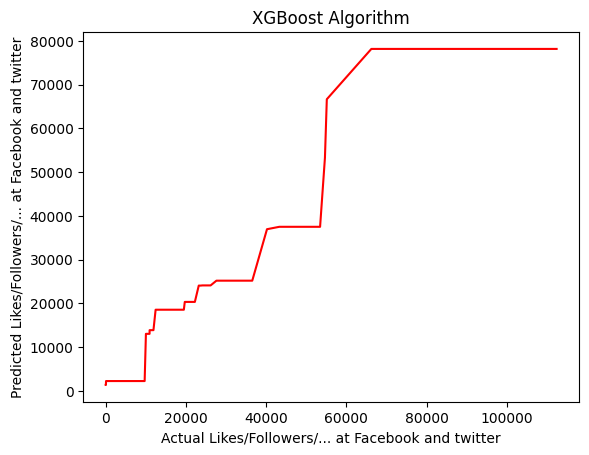

In [14]:
y_test3 = np.array(y_test3)
y_test3 = y_test3.reshape(len(y_test3))

#print(np.shape(y_test1))
#print(np.shape(predictions))

plt.plot(sorted(y_test3), sorted(predictions), color='r')
plt.xlabel('Actual Likes/Followers/... at Facebook and twitter')
plt.ylabel('Predicted Likes/Followers/... at Facebook and twitter')
plt.title('XGBoost Algorithm')
plt.show()




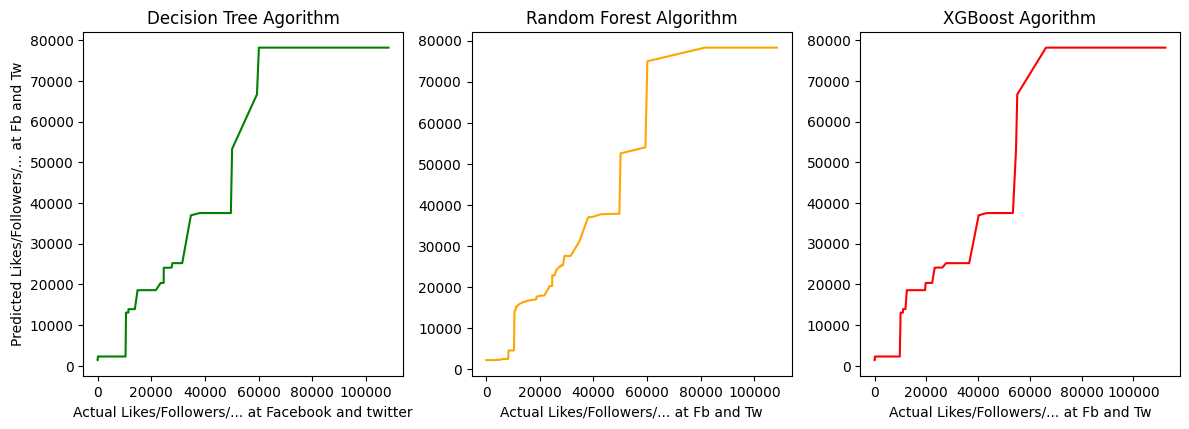

------------------Decision Tree Algorithm--------------------------
The root mean squared error for Decision Tree is: 4927.188790331218
The R2 score for Decision Tree is: 0.8089764600439032

-----------------------Random Forest Algorithm----------------------
The root mean squared error for Random Forest is: 4920.012979010444
The R2 score for Random Forest is: 0.8093891906951729

-----------------------XGBoost Algorithm----------------------
Mean Squared Error: 5335.944330454404
R2 Score: 0.7816510041779375


In [15]:
# importing required library
import matplotlib.pyplot as plt

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)


ax1 = plt.subplot2grid(shape=(3, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(3, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(3, 3), loc=(0, 2))


# plotting subplots

ax1.plot(sorted(y_test2), sorted(predictions), color='green')
ax1.set_title('Decision Tree Agorithm')
ax1.set_xlabel('Actual Likes/Followers/... at Facebook and twitter')
ax1.set_ylabel('Predicted Likes/Followers/... at Fb and Tw')

ax2.plot(sorted(y_test2), sorted(predictions1), color='orange')
ax2.set_title('Random Forest Algorithm')
ax2.set_xlabel('Actual Likes/Followers/... at Fb and Tw')

ax3.plot(sorted(y_test3), sorted(predictions), color='red')
ax3.set_title('XGBoost Agorithm')
ax3.set_xlabel('Actual Likes/Followers/... at Fb and Tw')

# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()

# display plot
plt.show()

print('------------------Decision Tree Algorithm--------------------------')
print('The root mean squared error for Decision Tree is:', error1)
print('The R2 score for Decision Tree is:', val1)

print('\n-----------------------Random Forest Algorithm----------------------')
print('The root mean squared error for Random Forest is:', error2)
print('The R2 score for Random Forest is:', val2)

print('\n-----------------------XGBoost Algorithm----------------------')
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
